In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
%matplotlib inline

In [2]:
# Load data
# Test data does not contain the response feature "target", thus we work only with the train set

df = pd.read_csv('data/aug_train.csv')
df.shape

(19158, 14)

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
# Lets have a look at which features are numerical and which are categorical, as well as the number of unique values and missing values

pd.concat([ df.dtypes, pd.Series([df[i].unique().shape[0] for i in df.isnull().sum().index], index=df.isnull().sum().index), df.isnull().sum(), pd.Series([round((i/df.shape[0])*100,2) for i in df.isnull().sum()], index=df.isnull().sum().index)], axis=1, keys=["dtypes","unique values", "isnull sum", "isnull %"])

,dtypes,unique values,isnull sum,isnull %
enrollee_id,int64,19158,0,0.00
city,object,123,0,0.00
city_development_index,float64,93,0,0.00
gender,object,4,4508,23.53
relevent_experience,object,2,0,0.00
enrolled_university,object,4,386,2.01
education_level,object,6,460,2.40
major_discipline,object,7,2813,14.68
experience,object,23,65,0.34
company_size,object,9,5938,30.99


In [5]:
print("we have {} categorical features and {} numerical features".format(df.select_dtypes(include='object').columns.shape[0], df.select_dtypes(include=["int","float"]).columns.shape[0]))

we have 10 categorical features and 4 numerical features


Class 0: 14381 % 75.07
Class 1: 4777 % 24.93
Proportion: 3.01 : 1


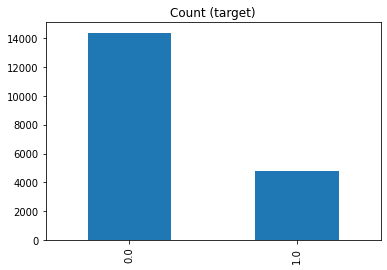

In [6]:
target_count = df.target.value_counts()
print('Class 0:', target_count[0], '%', round((target_count[0]/target_count.sum())*100,2))
print('Class 1:', target_count[1], '%', round((target_count[1]/target_count.sum())*100,2))
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [7]:
# We see right away that we can make the feature city numerical by removing the string "city_"

df['city'] = df['city'].apply(lambda x: x.split('_')[1])
df['city'] = df['city'].astype(int)

In [8]:
# Features with missing values less then 3%, i.e. enrolled_university, education_level, experience, last_new_job, will be imputed with the 
# most frequent value

cols_fill_mode = ["enrolled_university", "education_level", "experience", "last_new_job"]

for col in cols_fill_mode:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [9]:
# We can first do some preproccessing by just looking at the unique values and manually replacing some of the categorical features

In [10]:
df['relevent_experience'].unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [11]:
df['relevent_experience'] = df['relevent_experience'].replace("Has relevent experience",1)
df['relevent_experience'] = df['relevent_experience'].replace("No relevent experience",0)

In [12]:
df['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', 'Part time course'],
      dtype=object)

In [13]:
df['enrolled_university'] = df['enrolled_university'].replace("Full time course",1)
df['enrolled_university'] = df['enrolled_university'].replace("no_enrollment",0)
df['enrolled_university'] = df['enrolled_university'].replace("Part time course",0.5)

In [14]:
df.experience.unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20'],
      dtype=object)

In [15]:
df['experience'] = df['experience'].replace("<1","0")
df['experience'] = df['experience'].replace(">20","21")
df['experience'] = df['experience'].astype(int)

In [16]:
df.company_size.unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [17]:
df['company_size'] = df['company_size'].replace("10/49","10-49")
df['company_size'] = df['company_size'].replace("<10","1-9")
df['company_size'] = df['company_size'].replace("10000+","10000")

In [18]:
df.last_new_job.unique()

array(['1', '>4', 'never', '4', '3', '2'], dtype=object)

In [19]:
df['last_new_job'] = df['last_new_job'].replace(">4","5")
df['last_new_job'] = df['last_new_job'].replace("never","0")
df['last_new_job'] = df['last_new_job'].astype(int)

In [20]:
pd.concat([ df.dtypes, pd.Series([df[i].unique().shape[0] for i in df.isnull().sum().index], index=df.isnull().sum().index), df.isnull().sum(), pd.Series([round((i/df.shape[0])*100,2) for i in df.isnull().sum()], index=df.isnull().sum().index)], axis=1, keys=["dtypes","unique values","isnull sum", "isnull %"])

,dtypes,unique values,isnull sum,isnull %
enrollee_id,int64,19158,0,0.00
city,int64,123,0,0.00
city_development_index,float64,93,0,0.00
gender,object,4,4508,23.53
relevent_experience,int64,2,0,0.00
enrolled_university,float64,3,0,0.00
education_level,object,5,0,0.00
major_discipline,object,7,2813,14.68
experience,int64,22,0,0.00
company_size,object,9,5938,30.99


In [21]:
df["gender"].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [22]:
df_non_missing = df.dropna()
print("if we remove the remaining missing values we will loose {}% of the data".format(round((df_non_missing.shape[0] / df.shape[0])*100),2))

if we remove the remaining missing values we will loose 47% of the data


In [24]:
# We label the missing values with each own label "not_known" 

df = df.fillna("unknown")

In [25]:
df.isnull().any()

enrollee_id               False
city                      False
city_development_index    False
gender                    False
relevent_experience       False
enrolled_university       False
education_level           False
major_discipline          False
experience                False
company_size              False
company_type              False
last_new_job              False
training_hours            False
target                    False
dtype: bool

In [26]:
df.to_pickle("data/df_no_missing_values.pkl")

In [27]:
# Imputing for categorical features with Labelencoder

df_le=df.apply(LabelEncoder().fit_transform)

df_le.to_pickle("data/df_le.pkl")

In [28]:
df_le.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,5018,73,85,1,1,0,0,5,21,8,6,1,35,1
1,16986,27,48,1,0,0,0,5,15,5,5,5,46,0
2,6499,14,14,3,0,2,0,5,5,8,6,0,82,0
3,19067,81,52,3,0,0,0,1,0,8,5,0,51,1
4,358,113,45,1,1,0,2,5,21,5,1,4,7,0


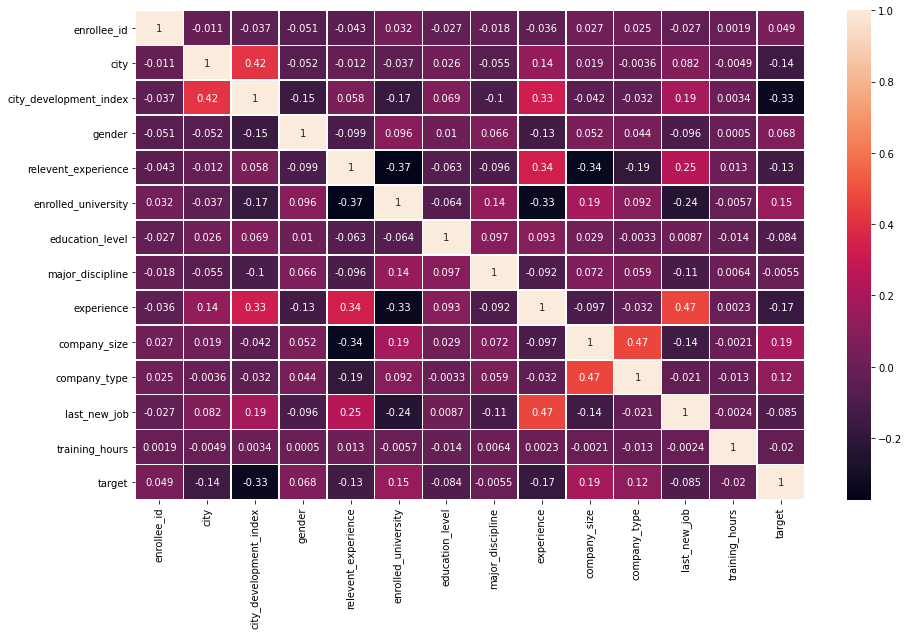

In [29]:
plt.subplots(figsize=(15, 9))
cor = df_le.corr()
sns.heatmap(cor, annot=True, linewidths=.5)
plt.show()